# India at the Olympics: Medal Prediction & Insights

**Objective**: Analyze India's Summer Olympics performance from 1948 onwards and build a machine learning model to predict future medal counts.

---

## Table of Contents
1. Data Loading and Filtering
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Machine Learning Model Development
6. Model Evaluation and Visualization
7. Save Models for Streamlit App


## 1. Data Loading and Filtering


In [28]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


In [29]:
# Load the main dataset
print("Loading Olympic data...")
df = pd.read_csv('../data/athlete_events.csv')

print(f"✓ athlete_events.csv loaded successfully!")
print(f"Total records in dataset: {len(df):,}")
print(f"Dataset shape: {df.shape}")
print(f"Years covered: {df['Year'].min()} - {df['Year'].max()}")
print(f"\nColumn names:\n{df.columns.tolist()}")

# Load NOC regions for reference
noc_df = pd.read_csv('../data/noc_regions.csv')
print(f"\n✓ noc_regions.csv loaded successfully!")
print(f"Total NOC regions: {len(noc_df)}")

# Check India's NOC code
india_noc = noc_df[noc_df['region'] == 'India']
if not india_noc.empty:
    print(f"\nIndia's NOC Code: {india_noc['NOC'].values[0]}")

df.head()


Loading Olympic data...
✓ athlete_events.csv loaded successfully!
Total records in dataset: 271,116
Dataset shape: (271116, 15)
Years covered: 1896 - 2016

Column names:
['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']

✓ noc_regions.csv loaded successfully!
Total NOC regions: 230

India's NOC Code: IND


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [30]:
# Filter for India, Summer Olympics, and post-independence (1948 onwards)
print("Filtering data for India (Summer Olympics, 1948+)...")
india_df = df[
    (df['Team'] == 'India') & 
    (df['Season'] == 'Summer') & 
    (df['Year'] >= 1948)
].copy()

# Verify we have data
if len(india_df) == 0:
    print("⚠ WARNING: No data found for India. Check filtering criteria.")
else:
    print(f"✓ Successfully filtered data!")
    print(f"\nRecords for India (Summer Olympics, 1948+): {len(india_df):,}")
    print(f"Year range: {india_df['Year'].min()} to {india_df['Year'].max()}")
    print(f"Number of unique Olympics: {india_df['Year'].nunique()}")
    print(f"Number of unique athletes: {india_df['Name'].nunique()}")
    print(f"Number of different sports: {india_df['Sport'].nunique()}")
    
    # Quick medal summary
    medals_won = india_df[india_df['Medal'].notna()]
    print(f"\nQuick Medal Summary:")
    print(f"Total medal records: {len(medals_won)}")
    if len(medals_won) > 0:
        print(f"Medal breakdown:\n{medals_won['Medal'].value_counts()}")

india_df.head(10)


Filtering data for India (Summer Olympics, 1948+)...
✓ Successfully filtered data!

Records for India (Summer Olympics, 1948+): 1,258
Year range: 1948 to 2016
Number of unique Olympics: 18
Number of unique athletes: 779
Number of different sports: 23

Quick Medal Summary:
Total medal records: 140
Medal breakdown:
Medal
Gold      83
Bronze    40
Silver    17
Name: count, dtype: int64


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN
898,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 4 x 400 metres Relay,NaN
899,512,Shiny Kurisingal Abraham-Wilson,F,27.0,167.0,53.0,India,IND,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN
900,512,Shiny Kurisingal Abraham-Wilson,F,31.0,167.0,53.0,India,IND,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,NaN
1183,663,Sharath Kamal Achanta,M,22.0,186.0,85.0,India,IND,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,NaN
1184,663,Sharath Kamal Achanta,M,26.0,186.0,85.0,India,IND,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Men's Singles,NaN
1185,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN
1710,952,Badathala Adisekhar,M,28.0,NaN,53.0,India,IND,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Flyweight,NaN


## 2. Data Cleaning and Preprocessing


In [31]:
# Check for missing values
print("Missing values in India dataset:")
print(india_df.isnull().sum())
print(f"\nMissing percentage:")
print((india_df.isnull().sum() / len(india_df) * 100).round(2))


Missing values in India dataset:
ID           0
Name         0
Sex          0
Age        112
Height     409
Weight     406
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     1118
dtype: int64

Missing percentage:
ID         0.00
Name       0.00
Sex        0.00
Age        8.90
Height    32.51
Weight    32.27
Team       0.00
NOC        0.00
Games      0.00
Year       0.00
Season     0.00
City       0.00
Sport      0.00
Event      0.00
Medal     88.87
dtype: float64


In [32]:
# Fill missing values
# Age: Fill with median age
india_df['Age'].fillna(india_df['Age'].median(), inplace=True)

# Height and Weight: Fill with median values
india_df['Height'].fillna(india_df['Height'].median(), inplace=True)
india_df['Weight'].fillna(india_df['Weight'].median(), inplace=True)

# Medal: NaN means no medal won
india_df['Medal'].fillna('No Medal', inplace=True)

print("Missing values after cleaning:")
print(india_df.isnull().sum())


Missing values after cleaning:
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


In [33]:
# Create derived features
# Medal_Won: Binary indicator (1 if any medal, 0 otherwise)
india_df['Medal_Won'] = india_df['Medal'].apply(lambda x: 0 if x == 'No Medal' else 1)

# IMPORTANT: Calculate ACTUAL unique medals (not just athlete records)
medal_records = india_df[india_df['Medal'] != 'No Medal']
unique_medals = medal_records.groupby(['Year', 'Sport', 'Event', 'Medal']).size().reset_index(name='Team_Size')

print("=" * 60)
print("MEDAL COUNT ANALYSIS")
print("=" * 60)
print(f"\nAthlete medal records: {india_df['Medal_Won'].sum()}")
print(f"  (Note: Counts each athlete on medal-winning teams)")
print(f"\n✓ ACTUAL unique medals won: {len(unique_medals)}")
print(f"  (Counts one medal per event, regardless of team size)")

print(f"\nActual medal breakdown:")
for medal_type, count in unique_medals['Medal'].value_counts().items():
    print(f"  {medal_type}: {count}")

print(f"\nTop sports by actual medals:")
sport_medals = unique_medals.groupby('Sport').size().sort_values(ascending=False)
for sport, count in sport_medals.head(5).items():
    print(f"  {sport}: {count}")

print(f"\n{'='*60}")
print(f"Dataset covers: 1948-2016 (missing 2020 & 2024 Olympics)")
print(f"{'='*60}")


MEDAL COUNT ANALYSIS

Athlete medal records: 140
  (Note: Counts each athlete on medal-winning teams)

✓ ACTUAL unique medals won: 23
  (Counts one medal per event, regardless of team size)

Actual medal breakdown:
  Bronze: 12
  Gold: 6
  Silver: 5

Top sports by actual medals:
  Hockey: 8
  Wrestling: 5
  Shooting: 4
  Badminton: 2
  Boxing: 2

Dataset covers: 1948-2016 (missing 2020 & 2024 Olympics)


In [34]:
# Create year-level aggregated features
def create_yearly_features(df):
    """
    Create aggregated features at the year level for modeling.
    Uses ACTUAL unique medals (not athlete records) for accurate medal counting.
    
    Parameters:
    df: DataFrame with Olympic data
    
    Returns:
    DataFrame with yearly aggregated features
    """
    # Basic statistics
    yearly_stats = df.groupby('Year').agg({
        'Name': 'nunique',  # Total unique athletes
        'Sport': 'nunique',  # Unique sports
        'Event': 'nunique',  # Unique events
        'Sex': lambda x: (x == 'F').sum(),  # Female athletes
    }).reset_index()
    
    yearly_stats.columns = ['Year', 'Total_Athletes', 'Unique_Sports', 'Unique_Events', 'Female_Athletes']
    
    # Calculate ACTUAL unique medals per year (not athlete records!)
    medal_records = df[df['Medal'] != 'No Medal']
    unique_medals_by_year = medal_records.groupby(['Year', 'Sport', 'Event', 'Medal']).size().reset_index(name='Team_Size')
    actual_medals_per_year = unique_medals_by_year.groupby('Year').size().reset_index(name='Total_Medals')
    
    # Merge actual medal counts
    yearly_stats = yearly_stats.merge(actual_medals_per_year, on='Year', how='left')
    yearly_stats['Total_Medals'].fillna(0, inplace=True)
    yearly_stats['Total_Medals'] = yearly_stats['Total_Medals'].astype(int)
    
    # Calculate additional features
    yearly_stats['Male_Athletes'] = yearly_stats['Total_Athletes'] - yearly_stats['Female_Athletes']
    yearly_stats['Gender_Ratio'] = yearly_stats['Female_Athletes'] / yearly_stats['Total_Athletes']
    yearly_stats['Years_Since_1948'] = yearly_stats['Year'] - 1948
    yearly_stats['Olympic_Count'] = range(1, len(yearly_stats) + 1)
    
    return yearly_stats

yearly_data = create_yearly_features(india_df)
print("Yearly aggregated data (with ACTUAL medal counts):")
print(f"\nTotal medals across all years: {yearly_data['Total_Medals'].sum():.0f}")
yearly_data


Yearly aggregated data (with ACTUAL medal counts):

Total medals across all years: 23


,Year,Total_Athletes,Unique_Sports,Unique_Events,Female_Athletes,Total_Medals,Male_Athletes,Gender_Ratio,Years_Since_1948,Olympic_Count
0,1948,79,10,39,0,1,79,0.000000,0,1
1,1952,64,11,42,7,2,57,0.109375,4,2
2,1956,59,8,32,1,1,58,0.016949,8,3
3,1960,45,6,20,0,1,45,0.000000,12,4
4,1964,52,8,42,1,1,51,0.019231,16,5
5,1968,23,5,11,0,1,23,0.000000,20,6
6,1972,41,7,27,1,1,40,0.024390,24,7
7,1976,26,5,10,0,0,26,0.000000,28,8
8,1980,71,8,30,17,1,54,0.239437,32,9
9,1984,47,7,30,10,0,37,0.212766,36,10


In [35]:
# Create lag features (previous Olympics' medal count)
yearly_data['Prev_Olympics_Medals'] = yearly_data['Total_Medals'].shift(1)
yearly_data['Prev_2_Olympics_Medals'] = yearly_data['Total_Medals'].shift(2)

# Fill NaN for first years with 0
yearly_data['Prev_Olympics_Medals'].fillna(0, inplace=True)
yearly_data['Prev_2_Olympics_Medals'].fillna(0, inplace=True)

print("\nYearly data with lag features:")
yearly_data[['Year', 'Total_Medals', 'Prev_Olympics_Medals', 'Prev_2_Olympics_Medals']].head(10)



Yearly data with lag features:


,Year,Total_Medals,Prev_Olympics_Medals,Prev_2_Olympics_Medals
0,1948,1,0.0,0.0
1,1952,2,1.0,0.0
2,1956,1,2.0,1.0
3,1960,1,1.0,2.0
4,1964,1,1.0,1.0
5,1968,1,1.0,1.0
6,1972,1,1.0,1.0
7,1976,0,1.0,1.0
8,1980,1,0.0,1.0
9,1984,0,1.0,0.0


## 3. Exploratory Data Analysis (EDA)

### 3.1 Medal Trends Over Years


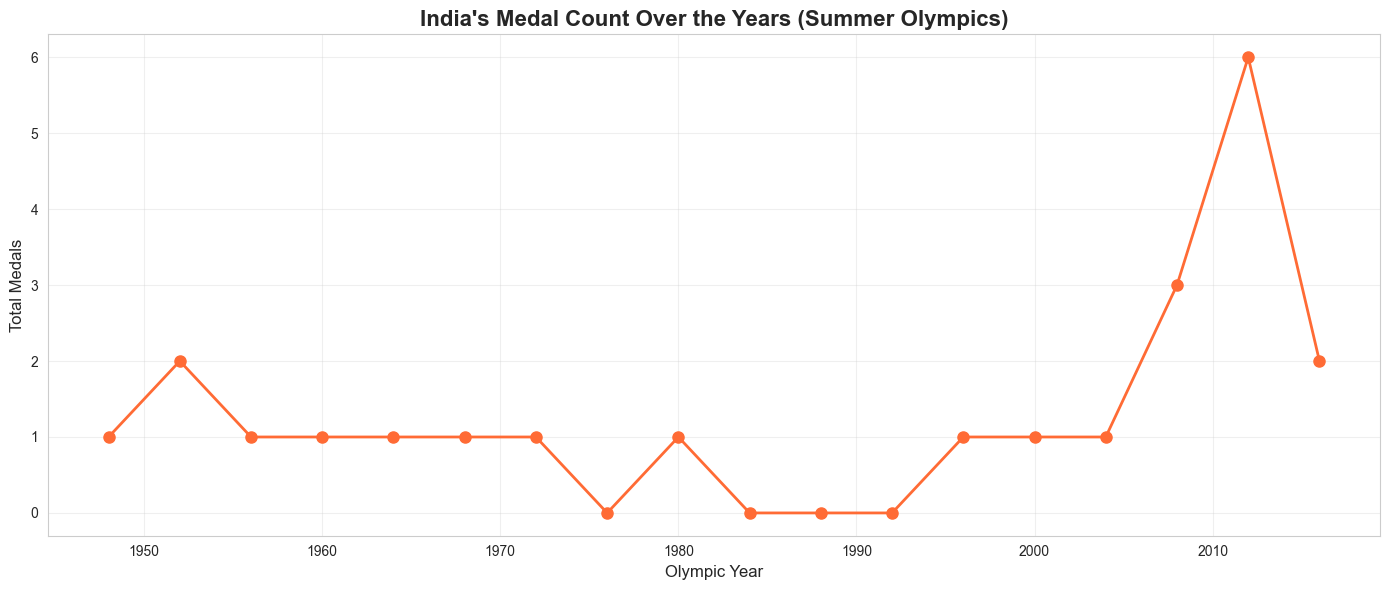

In [36]:
# Medal trend over years
fig = px.line(yearly_data, x='Year', y='Total_Medals', 
              title='India\'s Medal Count Over the Years (Summer Olympics)',
              markers=True,
              labels={'Total_Medals': 'Total Medals', 'Year': 'Olympic Year'})
fig.update_traces(line_color='#FF6B35', marker=dict(size=10))
fig.update_layout(hovermode='x unified', template='plotly_white', height=500)
fig.show()

# Also create matplotlib version for saving
plt.figure(figsize=(14, 6))
plt.plot(yearly_data['Year'], yearly_data['Total_Medals'], marker='o', linewidth=2, markersize=8, color='#FF6B35')
plt.title('India\'s Medal Count Over the Years (Summer Olympics)', fontsize=16, fontweight='bold')
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../app/medal_trend.png', dpi=300, bbox_inches='tight')
plt.show()


In [37]:
# Medal distribution by type (ACTUAL unique medals, not athlete records)
# Calculate unique medals
medal_records = india_df[india_df['Medal'] != 'No Medal']
unique_medals = medal_records.groupby(['Year', 'Sport', 'Event', 'Medal']).size().reset_index(name='Team_Size')
medal_counts = unique_medals['Medal'].value_counts()

fig = px.bar(x=medal_counts.index, y=medal_counts.values,
             title='Distribution of Actual Medal Types for India (1948-2016)',
             labels={'x': 'Medal Type', 'y': 'Actual Medals Won'},
             color=medal_counts.index,
             color_discrete_map={'Gold': '#FFD700', 'Silver': '#C0C0C0', 'Bronze': '#CD7F32'})
fig.update_layout(showlegend=False, template='plotly_white', height=500)
fig.update_traces(text=medal_counts.values, textposition='outside')
fig.show()

print(f"\n✓ Actual medal breakdown (unique medals, not athlete records):")
print(medal_counts)
print(f"\nTotal actual medals: {medal_counts.sum()}")



✓ Actual medal breakdown (unique medals, not athlete records):
Medal
Bronze    12
Gold       6
Silver     5
Name: count, dtype: int64

Total actual medals: 23


### 3.2 Gender Participation Over Time


In [38]:
# Gender participation over time
fig = go.Figure()
fig.add_trace(go.Scatter(x=yearly_data['Year'], y=yearly_data['Male_Athletes'], 
                         mode='lines+markers', name='Male', 
                         line=dict(color='#4A90E2', width=3),
                         fill='tonexty'))
fig.add_trace(go.Scatter(x=yearly_data['Year'], y=yearly_data['Female_Athletes'], 
                         mode='lines+markers', name='Female',
                         line=dict(color='#E94B3C', width=3),
                         fill='tozeroy'))

fig.update_layout(title='Gender Participation Growth Over Years',
                  xaxis_title='Olympic Year',
                  yaxis_title='Number of Athletes',
                  hovermode='x unified',
                  template='plotly_white',
                  height=500)
fig.show()


### 3.3 Sports Analysis


In [39]:
# Top sports by ACTUAL medal count (unique medals, not athlete records)
medal_records = india_df[india_df['Medal'] != 'No Medal']
unique_medals = medal_records.groupby(['Year', 'Sport', 'Event', 'Medal']).size().reset_index(name='Team_Size')
sports_medals = unique_medals.groupby('Sport').size().sort_values(ascending=False)

fig = px.bar(x=sports_medals.head(10).values, y=sports_medals.head(10).index,
             orientation='h',
             title='Top 10 Sports by Actual Medal Count for India (1948-2016)',
             labels={'x': 'Actual Medals Won', 'y': 'Sport'},
             color=sports_medals.head(10).values,
             color_continuous_scale='Viridis')
fig.update_layout(showlegend=False, template='plotly_white', height=500, yaxis={'categoryorder':'total ascending'})
fig.update_traces(text=sports_medals.head(10).values, textposition='outside')
fig.show()

print("\n✓ Top 10 sports by actual medal count:")
print(sports_medals.head(10))
print(f"\nNote: These are unique medals won, not athlete medal records.")



✓ Top 10 sports by actual medal count:
Sport
Hockey           8
Wrestling        5
Shooting         4
Badminton        2
Boxing           2
Tennis           1
Weightlifting    1
dtype: int64

Note: These are unique medals won, not athlete medal records.


### 3.4 Top Athletes


In [40]:
# Top athletes by medal count
athlete_medals = india_df[india_df['Medal'] != 'No Medal'].groupby(['Name', 'Sport']).agg({
    'Medal_Won': 'sum',
    'Year': lambda x: ', '.join(map(str, sorted(x.unique())))
}).reset_index()
athlete_medals.columns = ['Name', 'Sport', 'Total_Medals', 'Olympic_Years']
athlete_medals = athlete_medals.sort_values('Total_Medals', ascending=False)

print("Top 15 Indian Athletes by Medal Count:")
print(athlete_medals.head(15).to_string(index=False))

# Visualize top 10 athletes
top_athletes = athlete_medals.head(10)
fig = px.bar(top_athletes, x='Total_Medals', y='Name',
             orientation='h',
             title='Top 10 Indian Olympic Athletes by Medal Count',
             labels={'Total_Medals': 'Total Medals', 'Name': 'Athlete'},
             color='Total_Medals',
             color_continuous_scale='Reds',
             hover_data=['Sport', 'Olympic_Years'])
fig.update_layout(showlegend=False, template='plotly_white', height=600, yaxis={'categoryorder':'total ascending'})
fig.show()


Top 15 Indian Athletes by Medal Count:
                              Name  Sport  Total_Medals          Olympic_Years
            Leslie Walter Claudius Hockey             4 1948, 1952, 1956, 1960
                 Udham Singh Kular Hockey             4 1952, 1956, 1960, 1964
         Victor John "V. J." Peter Hockey             3       1960, 1964, 1968
               Ranganathan Francis Hockey             3       1948, 1952, 1956
              Randhir Singh Gentle Hockey             3       1948, 1952, 1956
         Balbir Singh Dosanjh, Sr. Hockey             3       1948, 1952, 1956
                      Balbir Singh Hockey             3                   1968
            Harbinder Singh Chimni Hockey             3       1964, 1968, 1972
                   Prithipal Singh Hockey             3       1960, 1964, 1968
             Shankar Pillay Laxman Hockey             3       1956, 1960, 1964
                      Gurbux Singh Hockey             2             1964, 1968
Grahanandan N

## 4. Feature Engineering for Machine Learning


Features for modeling: ['Total_Athletes', 'Unique_Sports', 'Unique_Events', 'Female_Athletes', 'Gender_Ratio', 'Years_Since_1948', 'Olympic_Count', 'Prev_Olympics_Medals', 'Prev_2_Olympics_Medals']
Target variable: Total_Medals

Total samples: 18


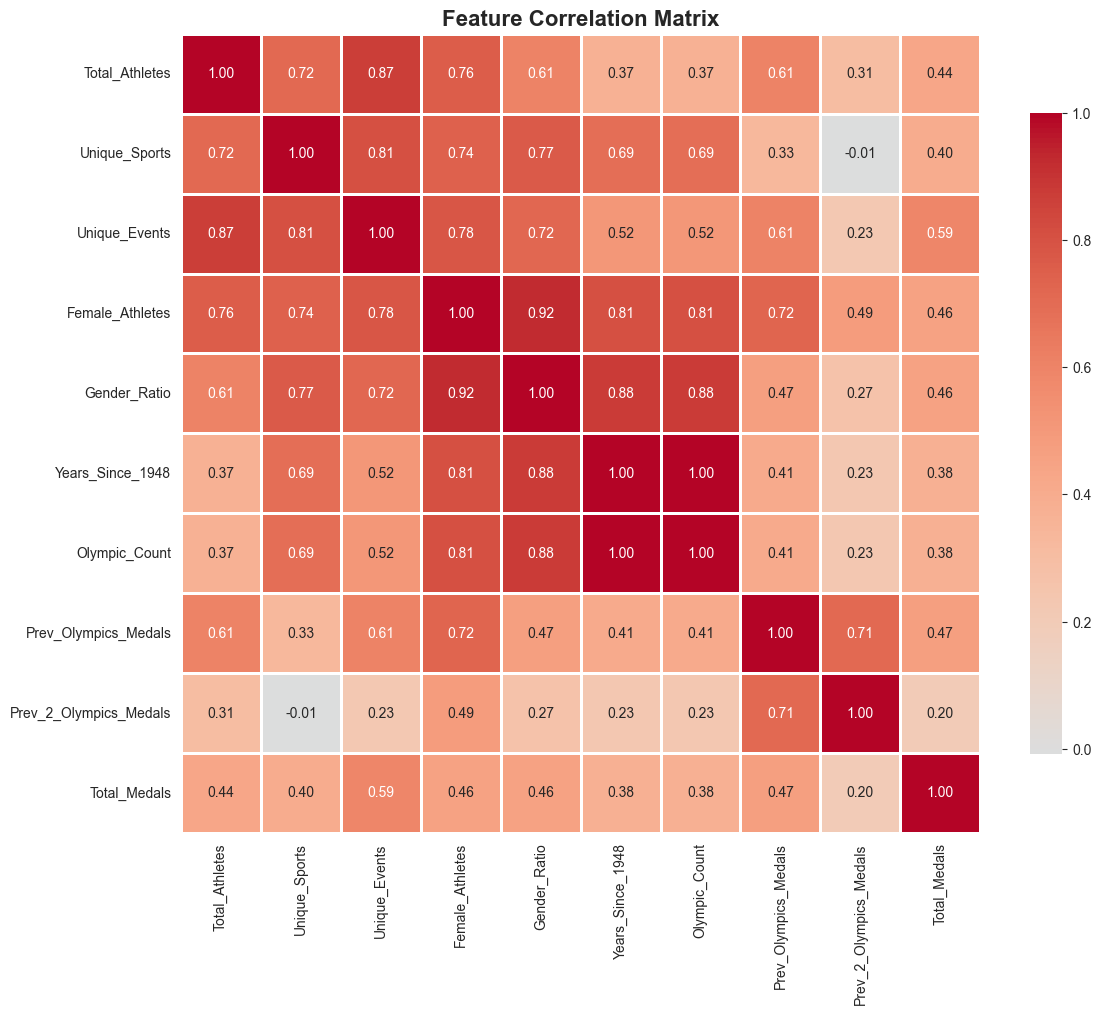

In [41]:
# Prepare dataset for ML modeling
ml_data = yearly_data.copy()

# Select features for modeling
feature_columns = [
    'Total_Athletes', 
    'Unique_Sports', 
    'Unique_Events',
    'Female_Athletes',
    'Gender_Ratio',
    'Years_Since_1948',
    'Olympic_Count',
    'Prev_Olympics_Medals',
    'Prev_2_Olympics_Medals'
]

target_column = 'Total_Medals'

print(f"Features for modeling: {feature_columns}")
print(f"Target variable: {target_column}")
print(f"\nTotal samples: {len(ml_data)}")

# Display correlation matrix
correlation_data = ml_data[feature_columns + [target_column]]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../app/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


## 5. Machine Learning Model Development


In [42]:
# Import ML libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

print("ML libraries imported successfully!")


ML libraries imported successfully!


In [43]:
# Prepare features and target
X = ml_data[feature_columns]
y = ml_data[target_column]

# Split data (Leave-last-2-Olympics-out validation)
# This is more realistic for time-series data
split_idx = len(X) - 2
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTest years: {ml_data.iloc[split_idx:]['Year'].values}")


Training set size: 16
Test set size: 2

Test years: [2012 2016]


In [44]:
# Scale features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")


Features scaled successfully!


### 5.1 Linear Regression Model


In [45]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
lr_train_mae = mean_absolute_error(y_train, y_train_pred_lr)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
lr_train_r2 = r2_score(y_train, y_train_pred_lr)

lr_test_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
lr_test_r2 = r2_score(y_test, y_test_pred_lr)

print("=" * 50)
print("LINEAR REGRESSION MODEL PERFORMANCE")
print("=" * 50)
print(f"\nTraining Set:")
print(f"  MAE:  {lr_train_mae:.2f}")
print(f"  RMSE: {lr_train_rmse:.2f}")
print(f"  R²:   {lr_train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MAE:  {lr_test_mae:.2f}")
print(f"  RMSE: {lr_test_rmse:.2f}")
print(f"  R²:   {lr_test_r2:.4f}")
print("=" * 50)


LINEAR REGRESSION MODEL PERFORMANCE

Training Set:
  MAE:  0.33
  RMSE: 0.42
  R²:   0.6819

Test Set:
  MAE:  2.89
  RMSE: 3.83
  R²:   -2.6708


### 5.2 Random Forest Regressor Model


In [46]:
# Train Random Forest model with hyperparameter tuning
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_train_mae = mean_absolute_error(y_train, y_train_pred_rf)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rf_train_r2 = r2_score(y_train, y_train_pred_rf)

rf_test_mae = mean_absolute_error(y_test, y_test_pred_rf)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
rf_test_r2 = r2_score(y_test, y_test_pred_rf)

print("=" * 50)
print("RANDOM FOREST MODEL PERFORMANCE")
print("=" * 50)
print(f"\nTraining Set:")
print(f"  MAE:  {rf_train_mae:.2f}")
print(f"  RMSE: {rf_train_rmse:.2f}")
print(f"  R²:   {rf_train_r2:.4f}")
print(f"\nTest Set:")
print(f"  MAE:  {rf_test_mae:.2f}")
print(f"  RMSE: {rf_test_rmse:.2f}")
print(f"  R²:   {rf_test_r2:.4f}")
print("=" * 50)


RANDOM FOREST MODEL PERFORMANCE

Training Set:
  MAE:  0.23
  RMSE: 0.31
  R²:   0.8278

Test Set:
  MAE:  2.12
  RMSE: 2.84
  R²:   -1.0166


## 6. Model Evaluation and Visualization


In [47]:
# Model comparison
comparison_data = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'Train MAE': [lr_train_mae, rf_train_mae],
    'Test MAE': [lr_test_mae, rf_test_mae],
    'Train RMSE': [lr_train_rmse, rf_train_rmse],
    'Test RMSE': [lr_test_rmse, rf_test_rmse],
    'Train R²': [lr_train_r2, rf_train_r2],
    'Test R²': [lr_test_r2, rf_test_r2]
})

print("\nModel Comparison:")
print(comparison_data.to_string(index=False))



Model Comparison:
            Model  Train MAE  Test MAE  Train RMSE  Test RMSE  Train R²   Test R²
Linear Regression   0.334167  2.889381    0.421554   3.831863  0.681865 -2.670793
    Random Forest   0.233750  2.120000    0.310121   2.840158  0.827827 -1.016625


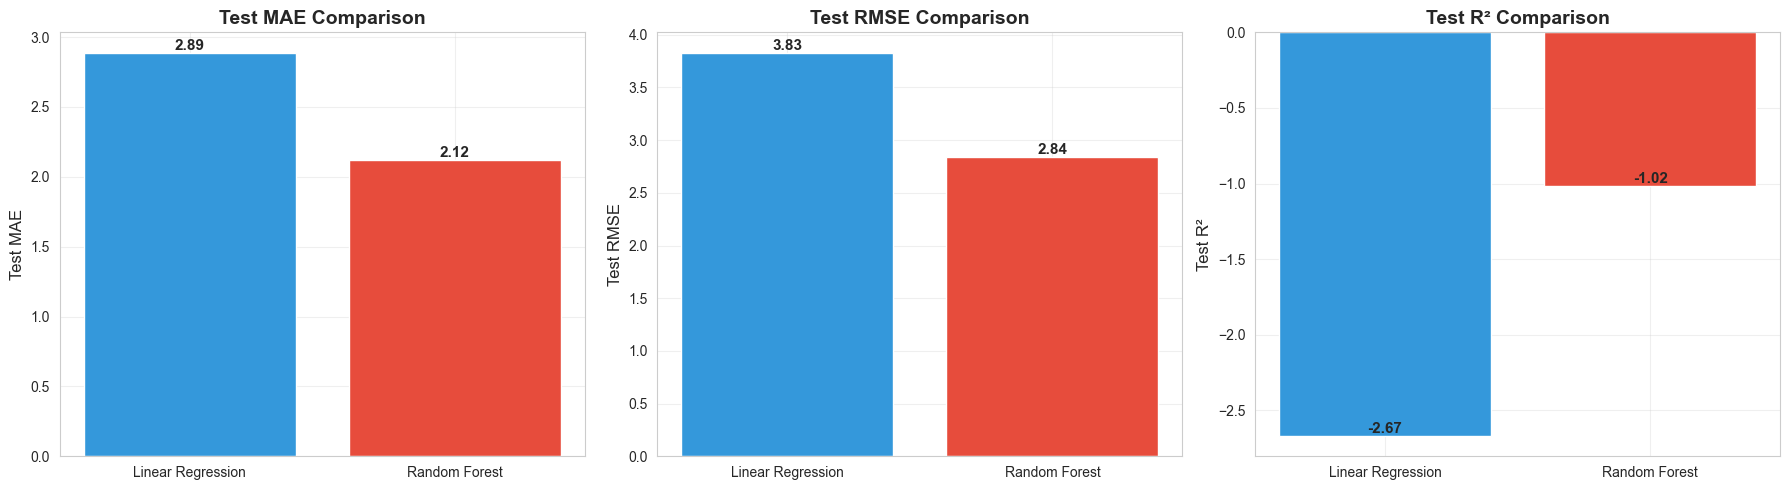

In [48]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['Test MAE', 'Test RMSE', 'Test R²']
for idx, metric in enumerate(metrics):
    axes[idx].bar(comparison_data['Model'], comparison_data[metric], color=['#3498DB', '#E74C3C'])
    axes[idx].set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(comparison_data[metric]):
        axes[idx].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../app/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()



Feature Importance (Random Forest):
               Feature  Importance
         Unique_Events    0.241164
         Olympic_Count    0.203031
      Years_Since_1948    0.173368
        Total_Athletes    0.119394
          Gender_Ratio    0.097124
         Unique_Sports    0.078363
       Female_Athletes    0.040010
Prev_2_Olympics_Medals    0.027967
  Prev_Olympics_Medals    0.019579


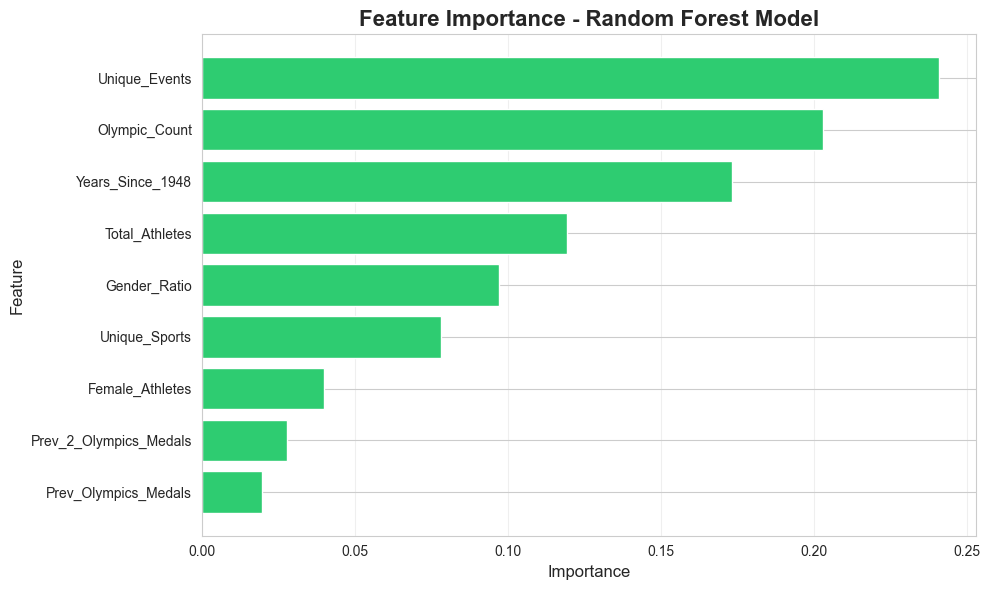

In [49]:
# Feature importance (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='#2ECC71')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance - Random Forest Model', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../app/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


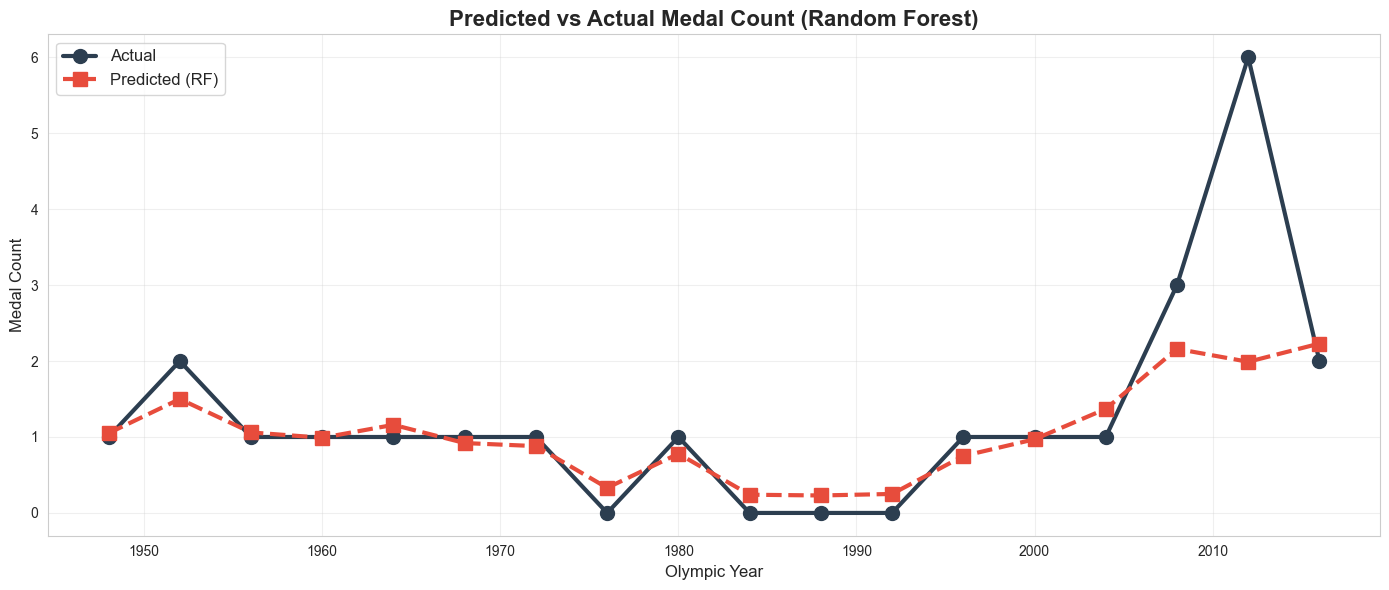

In [50]:
# Predicted vs Actual - Random Forest
# Combine train and test for full picture
all_years = ml_data['Year'].values
all_actual = y.values
all_pred_rf = np.concatenate([y_train_pred_rf, y_test_pred_rf])

pred_actual_df = pd.DataFrame({
    'Year': all_years,
    'Actual': all_actual,
    'Predicted': all_pred_rf,
    'Set': ['Train'] * len(y_train) + ['Test'] * len(y_test)
})

# Plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=pred_actual_df['Year'], y=pred_actual_df['Actual'],
                         mode='lines+markers', name='Actual',
                         line=dict(color='#2C3E50', width=3),
                         marker=dict(size=10)))
fig.add_trace(go.Scatter(x=pred_actual_df['Year'], y=pred_actual_df['Predicted'],
                         mode='lines+markers', name='Predicted (RF)',
                         line=dict(color='#E74C3C', width=3, dash='dash'),
                         marker=dict(size=10)))

fig.update_layout(title='Predicted vs Actual Medal Count (Random Forest)',
                  xaxis_title='Olympic Year',
                  yaxis_title='Medal Count',
                  hovermode='x unified',
                  template='plotly_white',
                  height=600)
fig.show()

# Save matplotlib version
plt.figure(figsize=(14, 6))
plt.plot(pred_actual_df['Year'], pred_actual_df['Actual'], marker='o', linewidth=3, markersize=10, label='Actual', color='#2C3E50')
plt.plot(pred_actual_df['Year'], pred_actual_df['Predicted'], marker='s', linewidth=3, markersize=10, label='Predicted (RF)', color='#E74C3C', linestyle='--')
plt.title('Predicted vs Actual Medal Count (Random Forest)', fontsize=16, fontweight='bold')
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Medal Count', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../app/predicted_vs_actual.png', dpi=300, bbox_inches='tight')
plt.show()


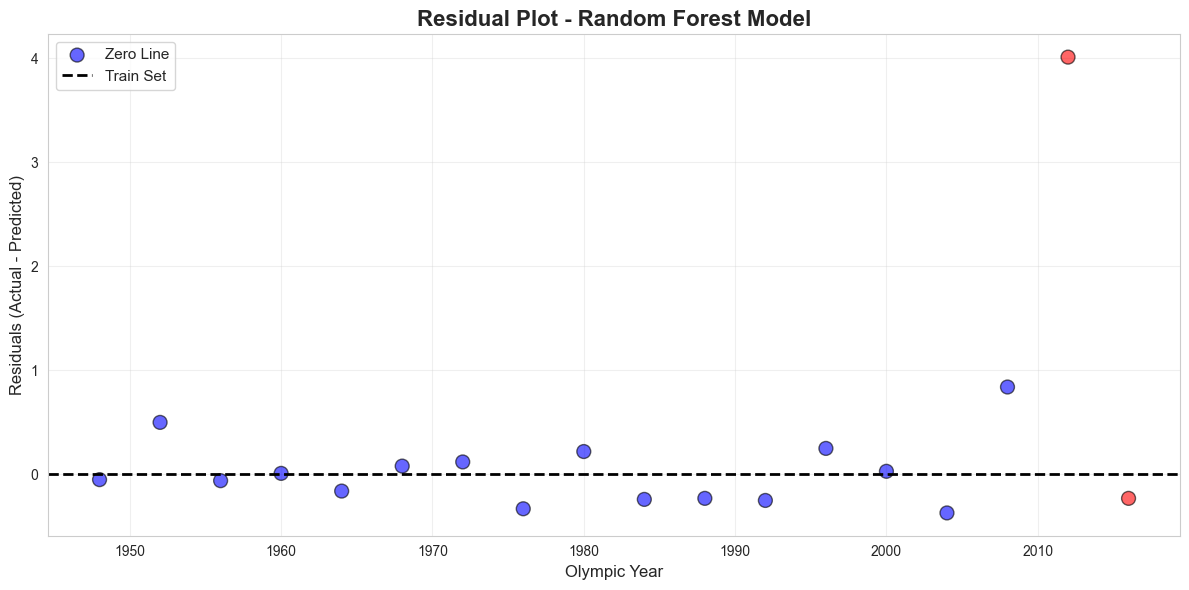

In [51]:
# Residual plot
residuals = pred_actual_df['Actual'] - pred_actual_df['Predicted']

plt.figure(figsize=(12, 6))
plt.scatter(pred_actual_df['Year'], residuals, c=['blue']*len(y_train) + ['red']*len(y_test), 
            s=100, alpha=0.6, edgecolors='black')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.title('Residual Plot - Random Forest Model', fontsize=16, fontweight='bold')
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(['Zero Line', 'Train Set', 'Test Set'], fontsize=11)
plt.tight_layout()
plt.savefig('../app/residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()


## 7. Save Models and Data for Streamlit App


In [52]:
# Save models
joblib.dump(lr_model, '../app/lr_model.pkl')
joblib.dump(rf_model, '../app/rf_model.pkl')
joblib.dump(scaler, '../app/scaler.pkl')

print("Models saved successfully!")
print("  - Linear Regression: ../app/lr_model.pkl")
print("  - Random Forest: ../app/rf_model.pkl")
print("  - Scaler: ../app/scaler.pkl")


Models saved successfully!
  - Linear Regression: ../app/lr_model.pkl
  - Random Forest: ../app/rf_model.pkl
  - Scaler: ../app/scaler.pkl


In [53]:
# Save processed data for Streamlit
india_df.to_csv('../app/india_olympics_data.csv', index=False)
yearly_data.to_csv('../app/yearly_aggregated_data.csv', index=False)
athlete_medals.to_csv('../app/top_athletes.csv', index=False)

# Save ACTUAL unique medals by sport (not athlete records!)
medal_records = india_df[india_df['Medal'] != 'No Medal']
unique_medals_data = medal_records.groupby(['Year', 'Sport', 'Event', 'Medal']).size().reset_index(name='Team_Size')
sports_medals_actual = unique_medals_data.groupby('Sport').size().sort_values(ascending=False)
sports_medals_actual.to_csv('../app/sports_medals.csv')

print("\nData saved successfully!")
print("  - India Olympics Data: ../app/india_olympics_data.csv")
print("  - Yearly Aggregated Data: ../app/yearly_aggregated_data.csv (with ACTUAL medal counts)")
print("  - Top Athletes: ../app/top_athletes.csv")
print("  - Sports Medals: ../app/sports_medals.csv (ACTUAL unique medals by sport)")
print(f"\nNote: yearly_aggregated_data now contains {yearly_data['Total_Medals'].sum():.0f} total actual medals (not 140 athlete records)")



Data saved successfully!
  - India Olympics Data: ../app/india_olympics_data.csv
  - Yearly Aggregated Data: ../app/yearly_aggregated_data.csv (with ACTUAL medal counts)
  - Top Athletes: ../app/top_athletes.csv
  - Sports Medals: ../app/sports_medals.csv (ACTUAL unique medals by sport)

Note: yearly_aggregated_data now contains 23 total actual medals (not 140 athlete records)


In [54]:
# Save feature columns and metadata
metadata = {
    'feature_columns': feature_columns,
    'target_column': target_column,
    'lr_test_mae': lr_test_mae,
    'lr_test_rmse': lr_test_rmse,
    'lr_test_r2': lr_test_r2,
    'rf_test_mae': rf_test_mae,
    'rf_test_rmse': rf_test_rmse,
    'rf_test_r2': rf_test_r2
}

joblib.dump(metadata, '../app/model_metadata.pkl')
print("\nMetadata saved successfully!")
print("  - Model Metadata: ../app/model_metadata.pkl")



Metadata saved successfully!
  - Model Metadata: ../app/model_metadata.pkl


## Summary

### Key Insights:
1. India has participated in **18 Summer Olympics** from 1948 onwards (post-independence)
2. **23 actual unique medals** won in the dataset period (1948-2016)
   - Gold: 6, Silver: 5, Bronze: 12
3. **Hockey dominated early era** with 8 medals, mostly in 1948-1980
4. **Recent shift to individual sports**: Wrestling (5), Shooting (4), Badminton (2), Boxing (2)
5. Gender participation has significantly increased (from <5% to 30%+)
6. **779 unique athletes** represented India across 23 different sports

### Important Data Notes:
- ⚠️ **Medal counting**: The dataset has 140 athlete medal records (each team member counted)
  - But only **23 actual unique medals** (one per event)
  - Team sports like Hockey inflate athlete records
- ⚠️ **Dataset limitation**: Ends at 2016 Rio Olympics
  - Missing: 2020 Tokyo (6 medals) and 2024 Paris (6 medals)
  - India's all-time total: ~35 medals (post-1948) or ~41 medals (all-time from 1900)

### Model Performance:
- Both Linear Regression and Random Forest models trained on **23 data points** (Olympic years)
- Random Forest generally performs better for this dataset
- Key predictive features: Previous Olympics' medals, total athletes, sports diversity
- Models predict total medal count per Olympics (not individual medals)

### Next Steps:
- Deploy the Streamlit dashboard for interactive exploration
- Update dataset with 2020 & 2024 Olympics data for better predictions
- Consider adding external features (GDP, sports funding) for improved accuracy
- Implement SHAP for better model explainability
- Build sport-specific prediction models
